In [79]:
%load_ext autoreload
%autoreload 2

import winsor as winsor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
import matplotlib.pyplot as plt

In [81]:
graph1 = winsor.genErdosRenyi(N=5242, E=14484)

number of nodes = 5242
number of edges = 14484


In [82]:
y = winsor.genCircle(N=5242)

number of nodes = 5242
number of edges = 5242


In [83]:
y = winsor.connectNbrOfNbr(y, N=5242)

number of nodes = 5242
number of edges = 10484


In [84]:
y = winsor.connectRandomNodes(graph2, M=4000)

number of nodes = 5242
number of edges = 14484


In [85]:
graph2 = winsor.genSmallWorld(N=5242, E=14484)


number of nodes = 5242
number of edges = 5242
number of nodes = 5242
number of edges = 10484
number of nodes = 5242
number of edges = 14484


In [86]:
path = "ca-GrQc.txt"
graph3 = winsor.loadCollabNet(path)

number of nodes = 5242
number of edges = 14484


A key difference between the collaboration and random models is the presence of nodes having higher degree. Specifically the random graphs do not have nodes with degree above 20, whereas the collaboration network has a few highly conneccted nodes, up to degree 80


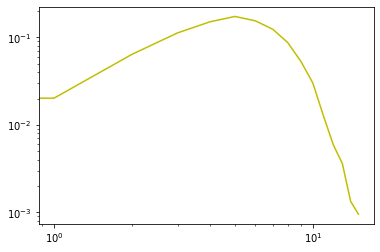

In [87]:
x_erdosRenyi, y_erdosRenyi = winsor.getDataPointsToPlot(graph1)
plt.loglog(x_erdosRenyi, y_erdosRenyi, color = 'y', label = 'Erdos Renyi Network')


A key difference between the collaboration and random models is the presence of nodes having higher degree. Specifically the random graphs do not have nodes with degree above 20, whereas the collaboration network has a few highly conneccted nodes, up to degree 80


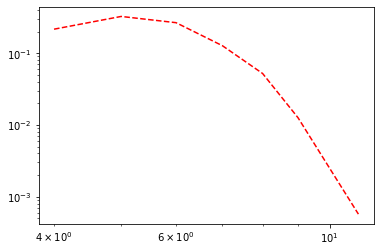

In [88]:
x_smallWorld, y_smallWorld = winsor.getDataPointsToPlot(graph2)
plt.loglog(x_smallWorld, y_smallWorld, linestyle = 'dashed', color = 'r', label = 'Small World Network')


A key difference between the collaboration and random models is the presence of nodes having higher degree. Specifically the random graphs do not have nodes with degree above 20, whereas the collaboration network has a few highly conneccted nodes, up to degree 80


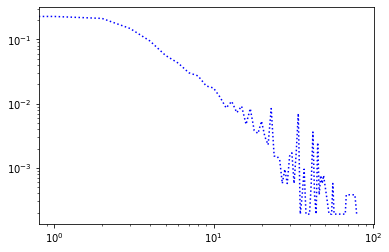

In [89]:
x_collabNet, y_collabNet = winsor.getDataPointsToPlot(graph3)
plt.loglog(x_collabNet, y_collabNet, linestyle = 'dotted', color = 'b', label = 'Collaboration Network')

number of nodes = 5242
number of edges = 14484
number of nodes = 5242
number of edges = 5242
number of nodes = 5242
number of edges = 10484
number of nodes = 5242
number of edges = 14484
number of nodes = 5242
number of edges = 14484
A key difference between the collaboration and random models is the presence of nodes having higher degree. Specifically the random graphs do not have nodes with degree above 20, whereas the collaboration network has a few highly conneccted nodes, up to degree 80
A key difference between the collaboration and random models is the presence of nodes having higher degree. Specifically the random graphs do not have nodes with degree above 20, whereas the collaboration network has a few highly conneccted nodes, up to degree 80
A key difference between the collaboration and random models is the presence of nodes having higher degree. Specifically the random graphs do not have nodes with degree above 20, whereas the collaboration network has a few highly connecct

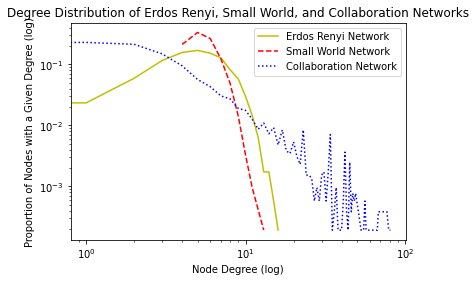

In [90]:
winsor.Q1_1()

# here

In [147]:
import snap
Graph = snap.TUNGraph.New()

Graph.AddNode(101)
Graph.AddNode(102)
Graph.AddNode(103)
Graph.AddNode(104)
Graph.AddNode(105)
Graph.AddNode(106)
Graph.AddNode(107)
Graph.AddNode(108)
Graph.AddNode(109)
Graph.AddNode(110)
Graph.AddNode(111)

Graph.AddEdge(102, 103)
Graph.AddEdge(103, 104)
Graph.AddEdge(103, 105)
Graph.AddEdge(104, 106)
Graph.AddEdge(105, 106)
Graph.AddEdge(106, 107)
Graph.AddEdge(102, 108)
Graph.AddEdge(108, 109)
Graph.AddEdge(108, 110)
Graph.AddEdge(108, 111)

Graph.AddEdge(109, 110)
Graph.AddEdge(110, 111)
Graph.AddEdge(109, 111)

print(Graph.GetNodes())
print(Graph.GetEdges())

print ("here")

11
13
here


In [116]:
qk = winsor.calcQk(Graph, 8)
qk
print(qk)

[0.2 0.3 0.3 0.2 0.  0.  0.  0. ]


In [117]:
foo = winsor. calcExpectedDegree(Graph)
foo

1.8181818181818181

In [118]:
foo = winsor.calcExpectedExcessDegree(Graph, qk)
print(foo)

eed calc 1 = 3.0
3.0


In [151]:

def neighbors_of_node(node):
    neighbor_set = set({})
    for n in range(node.GetDeg()):
        neighbor_set.add(node.GetNbrNId(n))
    return neighbor_set

def count_of_edges_between_neighbors(Graph, neighbor_set):
    count = 0
    for node1_id in neighbor_set:
        for node2_id in neighbor_set:
            if Graph.GetNI(node2_id).IsNbrNId(node1_id):
                count +=1
    return count // 2

from math import factorial
def comb(n, k):
    try:
        return factorial(n) // factorial(k) // factorial(n - k)
    except ValueError:
        return 0

def clustering_coefficient(Graph, neighbor_set):

    n = len(neighbor_set)
    if n < 2:
        return 0
    else:
        actual_edge_count = count_of_edges_between_neighbors(Graph, neighbor_set)
        n_choose_2 = comb(n,2)

        return actual_edge_count / n_choose_2

def average_clustering_coefficient(Graph):
    sum_clustering_coefficients = 0.0
    for node in Graph.Nodes():
        neighbor_set = neighbors_of_node(node)
        # print("\nnode: {}, degree {} len(neighbors) {} neighbors {}".format(node.GetId(), node.GetDeg(), len(neighbor_set), neighbor_set))
        clustering_coefficient_this_node = clustering_coefficient(Graph, neighbor_set)
        # print("clustering coefficient = {}".format(clustering_coefficient_this_node))
        sum_clustering_coefficients += clustering_coefficient_this_node
    return sum_clustering_coefficients / Graph.GetNodes()

acc = average_clustering_coefficient(Graph)
print("Average Clustering Coefficient = {}".format(acc))

Average Clustering Coefficient = 0.3181818181818182


In [154]:
y = winsor.calcClusteringCoefficient(Graph)
print("average_clustering_coefficient = {}".format(y))


average_clustering_coefficient = 0.3181818181818182


In [155]:
erdosRenyi = winsor.genErdosRenyi(5242, 14484)
smallWorld = winsor.genSmallWorld(5242, 14484)
collabNet = winsor.loadCollabNet("ca-GrQc.txt")


A key difference between the collaboration and random models is the highly connected nodes. The collaboration network has nodes up to degree 80 wheras nodes in the random models do not exceed degree 15. The highly referenced authors are probably important!


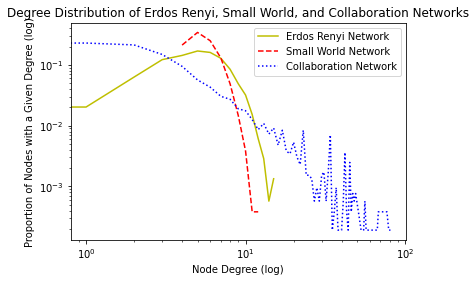

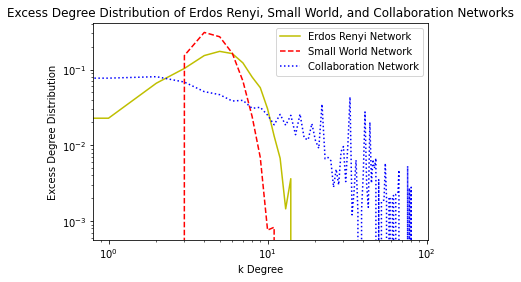

Expected Degree for Erdos Renyi: 5.526135
Expected Degree for Small World: 5.526135
Expected Degree for Collaboration Network: 5.526135
eed calc 1 = 11.063242198287766
eed calc 1 = 9.596520298260149
eed calc 1 = 31.74081745374206
Expected Excess Degree for Erdos Renyi: 11.063242
Expected Excess Degree for Small World: 9.596520
Expected Excess Degree for Collaboration Network: 31.740817
Clustering Coefficient for Erdos Renyi Network: 0.000921
Clustering Coefficient for Small World Network: 0.283485
Clustering Coefficient for Collaboration Network: 0.529636

A key difference between the collaboration and random models is the highly connected nodes. The collaboration network has nodes up to degree 80 wheras nodes in the random models do not exceed degree 15. The highly referenced authors are probably important!


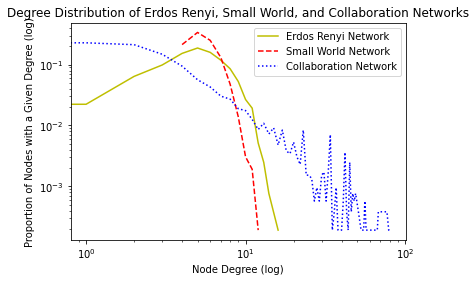

In [159]:
winsor.Q1_1()

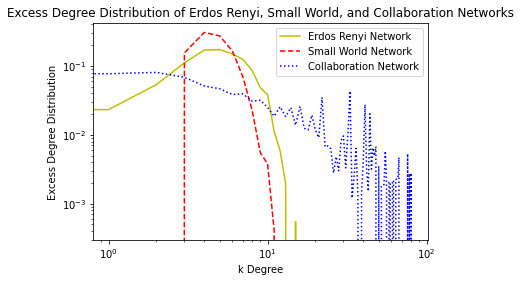

Expected Degree for Erdos Renyi: 5.526135
Expected Degree for Small World: 5.526135
Expected Degree for Collaboration Network: 5.526135
eed calc 1 = 11.010494338580502
eed calc 1 = 9.6017674675504
eed calc 1 = 31.74081745374206
Expected Excess Degree for Erdos Renyi: 11.010494
Expected Excess Degree for Small World: 9.601767
Expected Excess Degree for Collaboration Network: 31.740817


In [160]:
winsor.Q1_2_a()

In [ ]:
winsor.Q1_3()

# HERE